CHAPTER 11

Financial and Economic Data
Applications

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
from datetime import datetime


Alias    Description

B        business day frequency

C        custom business day frequency

D        calendar day frequency

W        weekly frequency

M        month end frequency

SM       semi-month end frequency (15th and end of month)

BM       business month end frequency

CBM      custom business month end frequency

MS       month start frequency

SMS      semi-month start frequency (1st and 15th)

BMS      business month start frequency

CBMS     custom business month start frequency

Q        quarter end frequency

BQ       business quarter end frequency

QS       quarter start frequency

BQS      business quarter start frequency

A, Y     year end frequency

BA, BY   business year end frequency

AS, YS   year start frequency

BAS, BYS business year start frequency

BH       business hour frequency

H        hourly frequency

T, min   minutely frequency

S        secondly frequency

L, ms    milliseconds

U, us    microseconds

N        nanoseconds

Sử dụng Python trong ngành tài chính tăng nhanh một cách đáng kể từ năm 2005, chủ
yếu là do sự lớn mạnh của các thư viện (như Numpy và Pandas) và kĩ năng sẵn có của
các lập trình viên Python chuyên nghiệp. Các tổ chức, cơ quan đã nhận thấy rằng Python
rất phù hợp với cả vai trò là một môi trường phân tích tương tác cũng như cho phép các
hệ thống mạnh mẽ được phát triển thường xuyên trong một khoảng thời gian ngắn so với
Java hoặc C++. Python cũng là một ngôn ngữ lý tưởng để xây dựng giao diện Python
cho các thư viện kế thừa được xây dựng trong C hoặc C++.

Trong những ví dụ này, tôi sẽ sử dụng thuật ngữ cross-section để chỉ dữ liệu tại một thời
điểm cố định. Ví dụ, giá đóng cửa của toàn bộ cổ phiếu của chỉ số S&P 500 vào một
ngày cụ thể tạo thành một cross-section. Dữ liệu cross-sectional tại nhiều thời điểm trên
nhiều mục dữ liệu (ví dụ như giá cả với khối lượng ) tạo thành một bảng điều khiển. Dữ
liệu bảng điều khiển có thành tạo thành bảng ở dưới dạng DataFrame hoặc sử dụng đối
tượng pandas Panel ba chiều

Data Munging Topics

Nhiều công cụ tổng hợp dữ liệu hữu ích cho các ứng dụng tài chính được trải rộng trong
các chương trước. Ở đây tôi sẽ nêu nổi bật một số chủ đề vì chúng liên quan đến đề này.

1.1 Time Series and Cross-Section Alignment

Một trong những vấn đề tốn nhiều thời gian nhất khi làm việc với dữ liệu tài chính là
vấn đề liên kết dữ liệu .Hai chuỗi thời gian liên quan có thể có các chỉ số không phù hợp
với nhau, hoặc hai đối tượng DataFrame có thể có các cột hoặc nhãn hàng không khớp.
Người dùng MATLAB, R và các ngôn ngữ lập trình ma trận khác thường đầu tư công
sức nỗ lực một cách đáng kể vào việc gói dữ liệu thành các dạng được căn chỉnh hoàn
hảo. Với kinh nghiệm, phải căn chỉnh dữ liệu bằng tay và tệ hơn là phải xác minh rằng
dữ liệu được căn chỉnh) là một cách cứng nhắc và nhàm chán . Nó cũng tiềm ẩn rất nhiều
lỗi do kết hợp dữ liệu bị lệch không đồng nhất với nhau.

Pandas thực hiện một cách tiếp cận thay thế bằng cách tự động căn chỉnh dữ liệu trong
các phép toán số học. Trên thực tế, điều này mang lại sự tự do to lớn và nâng cao năng
suất của bạn. Ví dụ: hãy xem xét một vài DataFrames chứa chuỗi thời gian về giá và khối
lượng cổ phiếu

In [2]:
b = [[379.74,  64.64  , 1165.24,  71.15 ],
       [383.93,  65.43, 1198.62 , 73.65],
       [384.14,  64.95, 1185.90, 72.82],
       [377.48,  63.64,  1154.23,  71.01],
       [379.94 ,  63.59 , 1162.27 , 71.84],
       [384.62,  63.61 , 1172.87 , 71.65],
       [389.30,  63.73,  1188.68,  72.64]]
b = np.array(b)
c = [[18173500,  15848300 , 25416300],
       [12492000, 10759700, 23108400],
       [14839800 , 15551500, 22434800],
       [20171900, 17008200,  27969100],
       [16697300, 13448200 , 26205800 ]]
c = np.array(c)
c

array([[18173500, 15848300, 25416300],
       [12492000, 10759700, 23108400],
       [14839800, 15551500, 22434800],
       [20171900, 17008200, 27969100],
       [16697300, 13448200, 26205800]])

In [3]:
#c =pd.date_range('9/6/2011', periods=7) 
d = ['2011-09-06','2011-09-07','2011-09-08','2011-09-09','2011-09-12','2011-09-13','2011-09-14']
e = ['2011-09-06','2011-09-07','2011-09-08','2011-09-09','2011-09-12']

In [4]:
prices = pd.DataFrame(b,
                     index=d,
                     columns=['AAPL', 'JNJ', 'SPX', 'XOM'])
volume = pd.DataFrame(c,
                     index=e,
                     columns=['AAPL', 'JNJ', 'XOM'])

In [5]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [6]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500,15848300,25416300
2011-09-07,12492000,10759700,23108400
2011-09-08,14839800,15551500,22434800
2011-09-09,20171900,17008200,27969100
2011-09-12,16697300,13448200,26205800


Giả sử bạn muốn tính giá trung bình theo khối lượng bằng cách sử dụng tất cả
dữ liệu (và đưa ra giả định đơn giản hóa rằng dữ liệu khối lượng là một tập hợp con của
dữ liệu giá). Vì pandas căn chỉnh dữ liệu tự động theo số học và loại trừ
thiếu dữ liệu trong các hàm như sum, chúng ta có thể diễn đạt điều này một cách ngắn gọn như sau:

In [7]:
prices*volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [8]:
(prices*volume).sum()#Tính tổng theo từng cột

AAPL    3.135628e+10
JNJ     4.676084e+09
SPX     0.000000e+00
XOM     9.012716e+09
dtype: float64

In [9]:
volume.sum()

AAPL     82374500
JNJ      72615900
XOM     125134400
dtype: int64

In [10]:
vwap = (prices * volume).sum() / volume.sum()


In [11]:
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [12]:
vwap.dropna()   #Xóa phần từ NaN

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

Vì không tìm thấy SPX trong số lượng, bạn có thể chọn loại bỏ nó bất kỳ lúc nào. Nếu
bạn muốn căn chỉnh bằng tay, bạn có thể sử dụng phương pháp căn chỉnh của DataFrame,
trả về một loạt các phiên bản được lập chỉ mục lại của hai đối tượng:


In [13]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [14]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500,15848300,25416300
2011-09-07,12492000,10759700,23108400
2011-09-08,14839800,15551500,22434800
2011-09-09,20171900,17008200,27969100
2011-09-12,16697300,13448200,26205800


In [15]:
#Căn chỉnh hai đối tượng trên trục của chúng bằng phương thức nối được chỉ định
#Bỏ các mục riêng, giữ lại các mục chung của cả 2
prices.align(volume, join='inner')  


(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                 AAPL       JNJ       XOM
 2011-09-06  18173500  15848300  25416300
 2011-09-07  12492000  10759700  23108400
 2011-09-08  14839800  15551500  22434800
 2011-09-09  20171900  17008200  27969100
 2011-09-12  16697300  13448200  26205800)

Một tính năng không thể thiếu khác là xây dựng DataFrame từ một tập hợp các Series
được lập chỉ mục khác nhau:

In [16]:
s1 = pd.Series(range(3), index=['a', 'b', 'c'])
s1

a    0
b    1
c    2
dtype: int64

In [17]:
s2 = pd.Series(range(4), index=['d', 'b', 'c', 'e'])
s2

d    0
b    1
c    2
e    3
dtype: int64

In [18]:
s3 = pd.Series(range(3), index=['f', 'a', 'c'])
s3

f    0
a    1
c    2
dtype: int64

In [19]:
pd.DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,two,three
a,0.0,NaN,1.0
b,1.0,1.0,NaN
c,2.0,2.0,2.0
d,NaN,0.0,NaN
e,NaN,3.0,NaN
f,NaN,NaN,0.0


Như bạn đã thấy trước đó, tất nhiên bạn có thể chỉ định rõ ràng chỉ mục của kết quả, loại
bỏ phần còn lại của dữ liệu:


In [20]:
pd.DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))
# in dex f, a, c, e

,one,two,three
f,NaN,NaN,0.0
a,0.0,NaN,1.0
c,2.0,2.0,2.0
e,NaN,3.0,NaN


1.2 Operations with Time Series of Different Frequencies

(Hoạt động với chuỗi thời gian có tần suất khác nhau)

Chuỗi thời gian kinh tế thường có tần suất hàng năm, hàng quý, hàng tháng, hàng ngày
hoặc một số tần suất chuyên biệt hơn. Một số là hoàn toàn không đều; ví dụ, các bản sửa
đổi thu nhập cho một cổ phiếu có thể đến bất kỳ lúc nào. Hai công cụ chính để chuyển
đổi tần số và sắp xếp lại là các phương pháp resample và reindex. Với resample giúp
chuyển đổi dữ liệu thành tần suất cố định trong khi reindex phù hợp dữ liệu với một chỉ
số mới. Cả hai đều hỗ trợ logic nội suy tùy chọn (chẳng hạn như điền chuyển tiếp).

Hãy xem xét một chuỗi thời gian nhỏ hàng tuần:

In [21]:
ts1 = pd.Series(np.random.randn(3),
index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))

#start: Bị ràng buộc trái để tạo ngày tháng, tạo bắt đầu từ mốc này
#Period: Số khoảng thời gian cần tạo.
#freq: Chuỗi tần số có thể có bội số, ví dụ: ‘5H’. Xem tại đây để biết danh. ở đây là W-WED bắt tạo bắt đầu từ thứ tư, sau mốc ngày đã có ở trện
#  sách các bí danh tần suất
ts1

2012-06-13   -0.204708
2012-06-20    0.478943
2012-06-27   -0.519439
Freq: W-WED, dtype: float64

Nếu bạn lấy lại mẫu cho tần suất làm việc hàng ngày (Thứ Hai-Thứ Sáu), bạn sẽ gặp vấn
đề vào những ngày không có dữ liệu

In [22]:
ts1.resample('B').mean() # lấy theo ngày bỏ thứ 7 chủ nhật

2012-06-13   -0.204708
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20    0.478943
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27   -0.519439
Freq: B, dtype: float64

Tất nhiên, việc sử dụng ’ffill’ như phương thức fillna sẽ điền các giá trị vào những
khoảng trống đó. Đây là một thực tế phổ biến với dữ liệu tần suất thấp hơn khi bạn tính
toán một chuỗi thời gian của các giá trị trên mỗi dấu thời gian có giá trị hợp lệ hoặc "tính
đến thời điểm" mới nhất.


In [23]:
ts1.resample('B').mean().fillna(method='ffill')  
#Sử dụng fillna với method=ffill => Lấy phần tử hợp lệ phía trên đó để điền vào NaN

2012-06-13   -0.204708
2012-06-14   -0.204708
2012-06-15   -0.204708
2012-06-18   -0.204708
2012-06-19   -0.204708
2012-06-20    0.478943
2012-06-21    0.478943
2012-06-22    0.478943
2012-06-25    0.478943
2012-06-26    0.478943
2012-06-27   -0.519439
Freq: B, dtype: float64

Trên thực tế, việc lấy mẫu dữ liệu tần số thấp hơn lên một tần số cao hơn, thường xuyên
là một giải pháp tốt, nhưng trong trường hợp chuỗi thời gian không thường xuyên nói
chung, nó có thể không phù hợp. Hãy xem xét một chuỗi thời gian được lấy mẫu bất
thường từ cùng một khoảng thời gian chung

In [24]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
'2012-6-21', '2012-6-22', '2012-6-29'])
dates

DatetimeIndex(['2012-06-12', '2012-06-17', '2012-06-18', '2012-06-21',
               '2012-06-22', '2012-06-29'],
              dtype='datetime64[ns]', freq=None)

In [25]:
ts2 = pd.Series(np.random.randn(6), index=dates)
ts2

2012-06-12   -0.555730
2012-06-17    1.965781
2012-06-18    1.393406
2012-06-21    0.092908
2012-06-22    0.281746
2012-06-29    0.769023
dtype: float64

Nếu bạn muốn thêm các giá trị "tính đến thời điểm" trong ts1 forward filling) vào ts2.
Một tùy chọn sẽ là lấy mẫu lại cả hai thành tần suất thông thường sau đó thêm vào, nhưng
nếu bạn muốn duy trì chỉ số ngày trong ts2, sử dụng reindex là một giải pháp chính xác hơn:


In [26]:
ts1.reindex(ts2.index, method='ffill')
#Đổi index của ts1 bằng index của ts2, đồng thời các phần tử NaN 
#thì điền vào bằng phương thức ffill - giống ở trên
# 12/6/2012 phía trên ko có giá trị nên nó vẫn để NaN


2012-06-12         NaN
2012-06-17   -0.204708
2012-06-18   -0.204708
2012-06-21    0.478943
2012-06-22    0.478943
2012-06-29   -0.519439
dtype: float64

In [27]:
ts2 + ts1.reindex(ts2.index, method='ffill')
# cộng 2 giá trị ts2 và ts1

2012-06-12         NaN
2012-06-17    1.761073
2012-06-18    1.188698
2012-06-21    0.571851
2012-06-22    0.760689
2012-06-29    0.249584
dtype: float64

Using periods instead of timestamps

(Sử dụng khoảng thời gian thay vì dấu thời gian)


Các khoảng thời gian (đại diện cho các khoảng thời gian) cung cấp một phương tiện
thay thế để làm việc với các chuỗi thời gian tần suất khác nhau, đặc biệt là các chuỗi thời
gian tài chính hoặc kinh tế với tần suất hàng năm hoặc hàng quý có quy ước báo cáo cụ
thể. Ví dụ: một công ty có thể công bố thu nhập hàng quý của mình với năm tài chính
kết thúc vào tháng 6, do đó có thời hạn miễn phí Q-JUN. Xem xét một cặp chuỗi thời
gian kinh tế vĩ mô liên quan đến GDP và lạm phát:

In [28]:
gdp = pd.Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
 index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
#Như dòng dưới, Q-SEP ở đây xếp theo từng Quý
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [29]:
infl = pd.Series([0.025, 0.045, 0.037, 0.04],
  index=pd.period_range('1982', periods=4, freq='A-DEC'))
# 1982 là mốc thời gia bắt đầu, period là số mốc thời gian
# freq hình như là từ khóa chỉ tần suất, A-DEC từ đầu năm đến chốt vào tháng 12
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

Không giống như chuỗi thời gian có dấu thời gian, các hoạt động giữa các chuỗi thời
gian có tần suất khác nhau được lập chỉ số theo các khoảng thời gian không thể thực hiện
được nếu không có các chuyển đổi rõ ràng. Trong trường hợp này, nếu chúng ta biết rằng
các giá trị lạm phát đã được quan sát vào cuối mỗi năm, thì chúng ta có thể chuyển đổi
sang Q-SEP để có được các khoảng thời gian phù hợp với tần suất đó:


In [30]:
infl_q = infl.asfreq('Q-SEP', how='end')
#chuyển đổi với từ khóa chỉ tần suất ở đây là chuyển thành các quý với Q-SEP
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

Chuỗi thời gian đó sau đó có thể được lập chỉ mục lại với tính năng điền chuyển tiếp để
khớp với gdp:

In [31]:
infl_q.reindex(gdp.index, method='ffill')
#Đối index

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

1.3 Time of Day and “as of” Data Selection

(Thời gian trong ngày và “tính đến thời điểm” Lựa chọn dữ liệu)

Giả sử bạn có một chuỗi thời gian dài chứa dữ liệu thị trường trong ngày và bạn muốn
trích xuất giá tại một thời điểm cụ thể trong ngày vào mỗi ngày của dữ liệu. Điều gì sẽ
xảy ra nếu dữ liệu không đều đặn đến mức các quan sát không rơi vào đúng thời gian
mong muốn thì sao? Trong thực tế, tác vụ này có thể khiến dữ liệu dễ bị lỗi nếu bạn
không cẩn thận. Đây là một ví dụ cho mục đích minh họa:

In [32]:
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')
#Khoảng thời gian các bước cách nhau 1 phút
rng

DatetimeIndex(['2012-06-01 09:30:00', '2012-06-01 09:31:00',
               '2012-06-01 09:32:00', '2012-06-01 09:33:00',
               '2012-06-01 09:34:00', '2012-06-01 09:35:00',
               '2012-06-01 09:36:00', '2012-06-01 09:37:00',
               '2012-06-01 09:38:00', '2012-06-01 09:39:00',
               ...
               '2012-06-01 15:50:00', '2012-06-01 15:51:00',
               '2012-06-01 15:52:00', '2012-06-01 15:53:00',
               '2012-06-01 15:54:00', '2012-06-01 15:55:00',
               '2012-06-01 15:56:00', '2012-06-01 15:57:00',
               '2012-06-01 15:58:00', '2012-06-01 15:59:00'],
              dtype='datetime64[ns]', length=390, freq='T')

In [33]:
ts = pd.Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00      0.0
2012-06-01 09:31:00      1.0
2012-06-01 09:32:00      2.0
2012-06-01 09:33:00      3.0
2012-06-01 09:34:00      4.0
                       ...  
2012-06-01 15:55:00    385.0
2012-06-01 15:56:00    386.0
2012-06-01 15:57:00    387.0
2012-06-01 15:58:00    388.0
2012-06-01 15:59:00    389.0
Freq: T, Length: 390, dtype: float64

In [34]:
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
rng
#BDay( tạo business day theo i  vì vậy tạo thêm 3 phần + 1 phần ban đầu nữa là 4 ) và ko lấy thứ 7 cn nên tạo ra 3 giá trị thứ
# 2 3 4 nên ngày 4 5 6 

DatetimeIndex(['2012-06-01 09:30:00', '2012-06-01 09:31:00',
               '2012-06-01 09:32:00', '2012-06-01 09:33:00',
               '2012-06-01 09:34:00', '2012-06-01 09:35:00',
               '2012-06-01 09:36:00', '2012-06-01 09:37:00',
               '2012-06-01 09:38:00', '2012-06-01 09:39:00',
               ...
               '2012-06-06 15:50:00', '2012-06-06 15:51:00',
               '2012-06-06 15:52:00', '2012-06-06 15:53:00',
               '2012-06-06 15:54:00', '2012-06-06 15:55:00',
               '2012-06-06 15:56:00', '2012-06-06 15:57:00',
               '2012-06-06 15:58:00', '2012-06-06 15:59:00'],
              dtype='datetime64[ns]', length=1560, freq=None)

In [35]:
print(len(rng))

1560


In [36]:
ts = pd.Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
                        ...  
2012-06-06 15:55:00    1555.0
2012-06-06 15:56:00    1556.0
2012-06-06 15:57:00    1557.0
2012-06-06 15:58:00    1558.0
2012-06-06 15:59:00    1559.0
Length: 1560, dtype: float64

Lập chỉ mục với một đối tượng datetime.time trong Python sẽ trích xuất các giá trị tại những thời điểm đó:

In [37]:
from datetime import time

In [38]:
ts[time(10, 0)] #lấy ts lúc 10h00


2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

Bên dưới, điều này sử dụng một phương thức cá thể at time (khả dụng trên các chuỗi
thời gian riêng lẻ và các đối tượng DataFrame như nhau):

In [39]:
ts.at_time(time(10, 0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

Bạn có thể chọn các giá trị giữa hai thời điểm bằng cách sử dụng phương thức betwee_time có liên quan:

In [40]:
ts.between_time(time(10, 0), time(10, 1)) #Lấy giữa 2 khoảng thời gian trong các ngày

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

Như đã đề cập ở trên, có thể xảy ra trường hợp không có dữ liệu nào thực sự rơi chính
xác vào một thời điểm như 10 giờ sáng, nhưng bạn có thể muốn biết giá trị được biết
cuối cùng vào lúc 10 giờ sáng:

In [41]:
len(ts)

1560

In [42]:
a = np.random.permutation(5)
a

array([4, 3, 1, 2, 0])

In [43]:
np.random.permutation(a)

array([2, 4, 0, 3, 1])

In [44]:
indexer = np.sort(np.random.permutation(len(ts))[700:])
#np.random.permutation(): hoán vị ngẫu nhiên
#[700:] ở đây ts có 1560 phần tử, lấy random và cắt từ vị trí 700 rồi sắp xếp lại
len(indexer)
indexer

860

array([   1,    5,   11,   12,   13,   16,   18,   21,   23,   27,   28,
         31,   34,   35,   36,   37,   38,   39,   42,   43,   44,   45,
         46,   48,   49,   51,   53,   60,   62,   66,   69,   71,   74,
         75,   77,   78,   79,   80,   83,   84,   85,   86,   88,   93,
         94,   95,   96,   99,  100,  102,  103,  105,  107,  108,  109,
        110,  112,  113,  114,  116,  117,  119,  120,  121,  122,  124,
        125,  126,  129,  132,  139,  140,  141,  142,  145,  146,  155,
        156,  157,  158,  159,  160,  161,  165,  168,  170,  171,  172,
        174,  176,  181,  182,  183,  184,  189,  191,  192,  194,  195,
        196,  197,  199,  200,  202,  203,  205,  209,  210,  211,  212,
        213,  214,  217,  218,  222,  224,  225,  226,  228,  230,  231,
        232,  233,  235,  237,  240,  241,  244,  247,  248,  249,  251,
        252,  254,  255,  257,  259,  261,  263,  269,  270,  271,  272,
        273,  274,  275,  276,  278,  279,  285,  2

In [45]:
irr_ts = ts.copy()

In [46]:
irr_ts[indexer] = np.nan
#Gán cho các phần tử có chỉ số thuộc indexer thành NaN

In [47]:
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00    20.0
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00     NaN
2012-06-01 09:54:00    24.0
2012-06-01 09:55:00    25.0
2012-06-01 09:56:00    26.0
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00    29.0
2012-06-01 10:00:00    30.0
dtype: float64

1.4 Splicing Together Data Sources

Nối các nguồn dữ liệu với nhau


Trong trường hợp đầu tiên, chuyển từ tập hợp chuỗi thời gian này sang tập hợp chuỗi
thời gian khác tại một thời điểm cụ thể, vấn đề là nối hai đối tượng TimeSeries hoặc
DataFrame lại với nhau bằng cách sử dụng pandas.concat:

In [48]:
data1 = pd.DataFrame(np.ones((6, 3), dtype=float),
  columns=['a', 'b', 'c'],
  index=pd.date_range('6/12/2012', periods=6))
data1

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,1.0,1.0,1.0
2012-06-16,1.0,1.0,1.0
2012-06-17,1.0,1.0,1.0


In [49]:
data2 = pd.DataFrame(np.ones((6, 3), dtype=float)* 2 ,
  columns=['a', 'b', 'c'],
  index=pd.date_range('6/13/2012', periods=6))
data2

,a,b,c
2012-06-13,2.0,2.0,2.0
2012-06-14,2.0,2.0,2.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [50]:
spliced = pd.concat([data1[:'2012-06-14'], data2['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


Giả sử trong một ví dụ tương tự rằng data1 thiếu chuỗi thời gian có trong data2:


In [51]:
data2 = pd.DataFrame(np.ones((6, 4), dtype=float) * 2,
columns=['a', 'b', 'c', 'd'],
index=pd.date_range('6/13/2012', periods=6))
data2

,a,b,c,d
2012-06-13,2.0,2.0,2.0,2.0
2012-06-14,2.0,2.0,2.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [52]:
spliced = pd.concat([data1[:'2012-06-14'], data2['2012-06-15':]])
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


Sử dụng combine_first, bạn có thể nhập dữ liệu từ trước điểm nối để mở rộng cho mục
’d’:

In [53]:
spliced_filled = spliced.combine_first(data2)
spliced_filled
#nhìn lên data2 rồi quan sát ta thấy, đối với các vị trị là null ở spliced_filled sẽ được điền bởi các phần tử ở 
# cùng vị trí với data2, còn vị trị đầu cột d do ở data2 không có nên nó vẫn là giá trị null

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


Vì data2 không có bất kỳ giá trị nào cho 2012-06-12, nên không có giá trị nào được
điền vào ngày đó.

DataFrame có bản cập nhật phương pháp liên quan để thực hiện cập nhật tại chỗ. Bạn
phải vượt qua overwrite = False để làm cho nó chỉ lấp đầy các lỗ:

In [54]:
spliced.update(data2, overwrite=True)
#Cập nhật các vị trí null bởi data2 như ở trên
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,2.0,2.0,2.0,2.0
2012-06-14,2.0,2.0,2.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


Để thay thế dữ liệu cho một tập hợp con các ký hiệu, bạn có thể sử dụng bất kỳ kỹ thuật
nào ở trên, nhưng đôi khi đơn giản hơn chỉ cần đặt các cột trực tiếp bằng lập chỉ mục
DataFrame:


In [55]:
cp_spliced = spliced.copy()
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,2.0,2.0,2.0,2.0
2012-06-14,2.0,2.0,2.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [56]:
data1

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,1.0,1.0,1.0
2012-06-16,1.0,1.0,1.0
2012-06-17,1.0,1.0,1.0


In [57]:
cp_spliced[['a', 'c']] = data1[['a', 'c']]
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,2.0,1.0,2.0
2012-06-14,1.0,2.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


1.5 Return Indexes and Cumulative Returns

Chỉ mục trả lại và lợi nhuận tích lũy

Trong bối cảnh tài chính, lợi nhuận thường đề cập đến phần trăm thay đổi trong giá của
một tài sản. Hãy xem xét dữ liệu giá của Apple trong năm 2011 và 2022:

In [58]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [59]:
from pandas_datareader import data
prices=data.DataReader('AAPL','yahoo','2011-01-01')['Adj Close']

In [60]:
prices[-5:]

Date
2022-11-28    144.220001
2022-11-29    141.169998
2022-11-30    148.029999
2022-12-01    148.309998
2022-12-02    145.850098
Name: Adj Close, dtype: float64

In [61]:
prices.head()

Date
2010-12-31     9.819854
2011-01-03    10.033263
2011-01-04    10.085629
2011-01-05    10.168123
2011-01-06    10.159907
Name: Adj Close, dtype: float64

Với Apple, công ty không có cổ tức, việc tính toán tỷ lệ hoàn vốn tích lũy giữa hai thời
điểm chỉ yêu cầu tính toán phần trăm thay đổi trong giá:


In [62]:
prices[1]/prices[0] - 1
#Tính tốc độ tăng trường so với trước

0.02173244414342501

Với các cổ phiếu khác có chi trả cổ tức, việc tính toán số tiền bạn kiếm được từ việc nắm
giữ một cổ phiếu có thể phức tạp hơn. Tuy nhiên, các giá trị đóng được điều chỉnh được
sử dụng ở đây đã được điều chỉnh cho các khoản chia tách và cổ tức. Trong mọi trường
hợp, việc lấy chỉ số hoàn vốn là một chuỗi thời gian cho biết giá trị của một khoản đầu tư
đơn vị (một đô la chẳng hạn) là điều khá phổ biến. Nhiều giả định có thể làm cơ sở cho
chỉ số trả về. Ví dụ, một số sẽ chọn tái đầu tư lợi nhuận và những người khác thì không.
Trong trường hợp của Apple, chúng ta có thể tính toán một chỉ số trả về đơn giản bằng
cách sử dụng cumprod:


In [63]:
#Phần trăm thay đổi giữa phần tử hiện tại và phần tử trước nó
returns = prices.pct_change()
returns

Date
2010-12-31         NaN
2011-01-03    0.021732
2011-01-04    0.005219
2011-01-05    0.008179
2011-01-06   -0.000808
                ...   
2022-11-28   -0.026264
2022-11-29   -0.021148
2022-11-30    0.048594
2022-12-01    0.001892
2022-12-02   -0.016586
Name: Adj Close, Length: 3002, dtype: float64

In [64]:
#tính tích lũy so với phần tử đầu tiên
ret_index = (1 + returns).cumprod()
ret_index

Date
2010-12-31          NaN
2011-01-03     1.021732
2011-01-04     1.027065
2011-01-05     1.035466
2011-01-06     1.034629
                ...    
2022-11-28    14.686573
2022-11-29    14.375978
2022-11-30    15.074562
2022-12-01    15.103076
2022-12-02    14.852573
Name: Adj Close, Length: 3002, dtype: float64

In [65]:
prices[3]/prices[0] 

1.035465850133191

In [66]:
ret_index[0] = 1 # Set first value to 1
ret_index


Date
2010-12-31     1.000000
2011-01-03     1.021732
2011-01-04     1.027065
2011-01-05     1.035466
2011-01-06     1.034629
                ...    
2022-11-28    14.686573
2022-11-29    14.375978
2022-11-30    15.074562
2022-12-01    15.103076
2022-12-02    14.852573
Name: Adj Close, Length: 3002, dtype: float64

Với một số chỉ số trả lại, việc tính toán lợi nhuận tích lũy tại một giải pháp cụ thể trở
nên đơn giản:

In [67]:
# với M là lấy giá trị trung bình của từng tháng cho tổng kết ở ngày cuối tháng
m_returns = ret_index.resample('M').mean()
m_returns

Date
2010-12-31     1.000000
2011-01-31     1.049045
2011-02-28     1.088736
2011-03-31     1.077291
2011-04-30     1.055356
                ...    
2022-08-31    16.962523
2022-09-30    15.555167
2022-10-31    14.742905
2022-11-30    14.848394
2022-12-31    14.977825
Freq: M, Name: Adj Close, Length: 145, dtype: float64

In [68]:
#kiểm chứng kết quả trên:
prices

Date
2010-12-31      9.819854
2011-01-03     10.033263
2011-01-04     10.085629
2011-01-05     10.168123
2011-01-06     10.159907
                 ...    
2022-11-28    144.220001
2022-11-29    141.169998
2022-11-30    148.029999
2022-12-01    148.309998
2022-12-02    145.850098
Name: Adj Close, Length: 3002, dtype: float64

In [69]:
prices['2011-01-03':'2011-01-31'].mean()/prices['2010-12-31 ']

1.0490451509357752

=>Chính xác

In [70]:
m_returns['2012']

Date
2012-01-31    1.328677
2012-02-29    1.542569
2012-03-31    1.790388
2012-04-30    1.878730
2012-05-31    1.750599
2012-06-30    1.781257
2012-07-31    1.863431
2012-08-31    1.998903
2012-09-30    2.122070
2012-10-31    1.976189
2012-11-30    1.763536
2012-12-31    1.664124
Freq: M, Name: Adj Close, dtype: float64

Tất nhiên, trong trường hợp đơn giản này (không tính đến cổ tức hoặc các điều chỉnh
khác), chúng có thể được tính từ phần trăm hàng ngày đã thay đổi bằng cách lấy mẫu lại
với tổng hợp (ở đây, thành các khoảng thời gian):


In [71]:
returns

Date
2010-12-31         NaN
2011-01-03    0.021732
2011-01-04    0.005219
2011-01-05    0.008179
2011-01-06   -0.000808
                ...   
2022-11-28   -0.026264
2022-11-29   -0.021148
2022-11-30    0.048594
2022-12-01    0.001892
2022-12-02   -0.016586
Name: Adj Close, Length: 3002, dtype: float64

In [72]:
#Với lấy mẫu theo M là lấy mẫu theo từng tháng, BỔ SUNG: chỗ kind = period chuyển đổi index thành năm với tháng
m_rets = (1 + returns).resample('M', kind='period').mean() - 1
m_rets

Date
2010-12         NaN
2011-01    0.002635
2011-02    0.002203
2011-03   -0.000457
2011-04    0.000296
             ...   
2022-08   -0.001252
2022-09   -0.005864
2022-10    0.005297
2022-11   -0.001179
2022-12   -0.007347
Freq: M, Name: Adj Close, Length: 145, dtype: float64

In [73]:
m_rets['2012']

Date
2012-01    0.006125
2012-02    0.008733
2012-03    0.004670
2012-04   -0.000875
2012-05   -0.000333
2012-06    0.000600
2012-07    0.002249
2012-08    0.003964
2012-09    0.000252
2012-10   -0.005247
2012-11   -0.000315
2012-12   -0.004469
Freq: M, Name: Adj Close, dtype: float64

Group Transforms and Analysis

Chuyển đổi nhóm và phân tích


Trong Chương 9, bạn đã học những kiến thức cơ bản về tính toán thống kê nhóm và áp
dụng các phép biến đổi của riêng bạn cho các nhóm trong tập dữ liệu.

Hãy xem xét một tập hợp các danh mục cổ phiếu giả định. Đầu tiên tôi tạo ngẫu nhiên
một không gian gồm 2000 mã:

In [74]:
import random; random.seed(0)
import string

In [75]:
k = string.ascii_uppercase
k

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [76]:
''.join([random.choice(k) for _ in range(10)])

'MYNBIQPMZJ'

In [77]:
[random.choice(k) for _ in range(10)]

['P', 'L', 'S', 'G', 'Q', 'E', 'J', 'E', 'Y', 'D']

In [78]:
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])
print(len(tickers))
tickers
# tạo 1000 tên công ty

1000


array(['TZIRW', 'ZTEJD', 'XCVKP', 'RDLNK', 'TUGRP', 'OQIBZ', 'RACXM',
       'WZVUA', 'TPKHX', 'KWCGS', 'HHZEZ', 'ROCCK', 'QPDJR', 'JWDRK',
       'RGZTR', 'SJOCT', 'ZMKSH', 'JFGFB', 'TVIPC', 'CVYEE', 'BCWRV',
       'MWQIQ', 'ZHGVS', 'NSIOP', 'VUWZL', 'CKTDP', 'SUKGH', 'AXIDW',
       'HLZFK', 'NBDZE', 'WHBSU', 'RTVCA', 'DUGTS', 'DMCLD', 'BTAGF',
       'WDPGX', 'ZBVAR', 'NTDIC', 'HCUJL', 'NFBQO', 'BTDWM', 'GILXP',
       'SFWVG', 'YBZVF', 'FKQID', 'TOVFA', 'PVNSQ', 'JULMV', 'IERWA',
       'OXCKX', 'BRIEH', 'YPLTJ', 'VLSUT', 'EWJMX', 'NUCAT', 'GWKFH',
       'HUOMW', 'VSNBM', 'WSNYV', 'WBFOC', 'IWFOQ', 'PRTYA', 'BPKJO',
       'BZZNG', 'RUCXE', 'AMVNK', 'AGAWY', 'AVQTD', 'GDTUG', 'JIWFD',
       'PMUCA', 'IOZZD', 'IEUQU', 'ULDEI', 'ABBGV', 'IRKLS', 'BXWTU',
       'PWUOU', 'NLRFG', 'MSJAE', 'EIKKZ', 'LWCKY', 'TBBIF', 'ESJLM',
       'REJDP', 'XHBJF', 'QXCJM', 'KJNDD', 'RPPKZ', 'ZKDPD', 'WPNBJ',
       'KXVEF', 'USMZU', 'CCZCG', 'XHBMA', 'DMRQJ', 'OPZSW', 'VGNCL',
       'HISYF', 'NGL

Sau đó, tôi tạo một DataFrame chứa 3 cột đại diện cho danh mục đầu tư giả định, nhưng
ngẫu nhiên cho một tập hợp con các mã:


In [79]:
M = 500
df = pd.DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
 'Value' : np.random.randn(M) / 200 + 0.08,
 'ShortInterest' : np.random.randn(M) / 200 - 0.02},
 index=tickers[:M])

df

,Momentum,Value,ShortInterest
TZIRW,0.036232,0.083840,-0.025925
ZTEJD,0.026392,0.091308,-0.023693
XCVKP,0.026649,0.082629,-0.018115
RDLNK,0.030242,0.078686,-0.014598
TUGRP,0.028717,0.075105,-0.019000
...,...,...,...
GXKFD,0.033158,0.077649,-0.019906
FZWLA,0.034631,0.083054,-0.018897
HBAMR,0.028261,0.084514,-0.016528
AEDTT,0.028074,0.069093,-0.019348


Tiếp theo, hãy tạo phân loại ngành ngẫu nhiên cho các mã. Để đơn giản hóa mọi thứ, tôi
sẽ chỉ giữ nó cho 2 ngành, lưu trữ ánh xạ trong một Series:

In [80]:
ind_names = np.array(['FINANCIAL', 'TECH'])
ind_names


array(['FINANCIAL', 'TECH'], dtype='<U9')

In [81]:
#tạo bảng giá trị ngẫu nhiên từ 0 đến 1 (len = 2) với 1000 (N) giá trị
sampler = np.random.randint(0, len(ind_names), N)
sampler

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [82]:
# giá trị là TECH hoặc FINANCIAL, index là các mã cố phiếu
industries = pd.Series(ind_names[sampler], index=tickers,
name='industry')
industries

TZIRW    FINANCIAL
ZTEJD    FINANCIAL
XCVKP    FINANCIAL
RDLNK         TECH
TUGRP         TECH
           ...    
FCVKF         TECH
ILVWD         TECH
DMKYK    FINANCIAL
JKYAG         TECH
VUJUF         TECH
Name: industry, Length: 1000, dtype: object

In [83]:
df

,Momentum,Value,ShortInterest
TZIRW,0.036232,0.083840,-0.025925
ZTEJD,0.026392,0.091308,-0.023693
XCVKP,0.026649,0.082629,-0.018115
RDLNK,0.030242,0.078686,-0.014598
TUGRP,0.028717,0.075105,-0.019000
...,...,...,...
GXKFD,0.033158,0.077649,-0.019906
FZWLA,0.034631,0.083054,-0.018897
HBAMR,0.028261,0.084514,-0.016528
AEDTT,0.028074,0.069093,-0.019348


Giờ đây, chúng tôi có thể nhóm theo ngành và thực hiện tổng hợp và chuyển đổi nhóm:

In [84]:
by_industry = df.groupby(industries)
by_industry

In [85]:
by_industry.mean()

,Momentum,Value,ShortInterest
industry,,,
FINANCIAL,0.029732,0.079831,-0.019697
TECH,0.029928,0.080285,-0.019937


In [86]:
by_industry.describe() #thống kê các chỉ số cơ bản

Momentum                                                    \
             count      mean       std       min       25%       50%   
industry                                                               
FINANCIAL    243.0  0.029732  0.005102  0.014293  0.026682  0.029694   
TECH         257.0  0.029928  0.004905  0.017387  0.026320  0.029661   

                               Value            ...                      \
                75%       max  count      mean  ...       75%       max   
industry                                        ...                       
FINANCIAL  0.032808  0.043353  243.0  0.079831  ...  0.083253  0.092782   
TECH       0.033343  0.046891  257.0  0.080285  ...  0.083764  0.092041   

          ShortInterest                                                    \
                  count      mean       std       min       25%       50%   
industry                                                                    
FINANCIAL         243.0 -0.019697  0.004899 -0.031928 -0.023105 -0.019841   
TECH              257.0 -0.019937  0.004959 -0.033352 -0.023688 -0.020002   

                               
                75%       max  
industry                       
FINANCIAL -0.015951 -0.004737  
TECH      -0.016652 -0.005802  

[2 rows x 24 columns]

Bằng cách xác định các chức năng chuyển đổi, có thể dễ dàng chuyển đổi các danh mục
đầu tư này theo ngành. Ví dụ, tiêu chuẩn hóa trong ngành được sử dụng rộng rãi trong
việc xây dựng danh mục đầu tư vốn chủ sở hữu:


In [87]:
#std độ lệch chuẩn
def zscore(group):
     return (group - group.mean()) / group.std()
df_stand = by_industry.apply(zscore) # áp dụng vào hàm cho từng cột
df_stand

,Momentum,Value,ShortInterest
TZIRW,1.274167,0.805787,-1.271204
ZTEJD,-0.654766,2.307015,-0.815689
XCVKP,-0.604201,0.562348,0.322826
RDLNK,0.063994,-0.314204,1.076739
TUGRP,-0.247038,-1.018207,0.189065
...,...,...,...
GXKFD,0.658457,-0.518060,0.006212
FZWLA,0.960282,0.647844,0.163306
HBAMR,-0.339943,0.831233,0.687480
AEDTT,-0.324915,-2.158651,0.071258


Bạn có thể xác minh rằng mỗi ngành có trung bình 0 và độ lệch chuẩn 1:

In [88]:
df_stand.groupby(industries)

In [89]:
#tổng hợp theo từng nhóm ngành
#tính giá trị trung bình và độ lệch chuẩn theo từng cột
df_stand.groupby(industries).agg(['mean', 'std'])


Momentum              Value      ShortInterest     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL -2.935009e-15  1.0  1.242171e-14  1.0  4.806398e-16  1.0
TECH       8.814825e-16  1.0  5.925221e-15  1.0  2.596280e-15  1.0

Các loại biến đổi tích hợp khác, chẳng hạn như xếp hạng, có thể được sử dụng ngắn gọn
hơn:


In [90]:
ind_rank = by_industry.rank(ascending=True) # xếp hạng các giá trị
ind_rank 

,Momentum,Value,ShortInterest
TZIRW,220.0,188.0,21.0
ZTEJD,55.0,241.0,53.0
XCVKP,60.0,168.0,149.0
RDLNK,137.0,94.0,221.0
TUGRP,110.0,36.0,147.0
...,...,...,...
GXKFD,190.0,70.0,133.0
FZWLA,202.0,176.0,137.0
HBAMR,102.0,201.0,195.0
AEDTT,89.0,6.0,129.0


In [91]:
s = pd.Series(range(5), index=list("abcde"))
s
s["d"] = s["b"]
s
s.rank()


a    0
b    1
c    2
d    3
e    4
dtype: int64

a    0
b    1
c    2
d    1
e    4
dtype: int64

a    1.0
b    2.5
c    4.0
d    2.5
e    5.0
dtype: float64

In [92]:
ind_rank.groupby(industries).agg(['min', 'max'])


Momentum        Value        ShortInterest       
               min    max   min    max           min    max
industry                                                   
FINANCIAL      1.0  243.0   1.0  243.0           1.0  243.0
TECH           1.0  257.0   1.0  257.0           1.0  257.0

Trong công bằng định lượng, “xếp hạng và tiêu chuẩn hóa” là một chuỗi biến đổi phổ
biến. Bạn có thể làm điều này bằng cách xâu chuỗi rank và zs_core lại với nhau như sau:

# 2.1 Group Factor Exposures

Phân tích nhân tố là một kỹ thuật trong quản lý danh mục đầu tư định lượng. Danh mục
đầu tư nắm giữ và hiệu suất (lợi nhuận và ít hơn) được phân tách bằng cách sử dụng một
hoặc nhiều yếu tố (ví dụ về mặt rủi ro) được biểu thị dưới dạng danh mục trọng số. Ví
dụ: giá cổ phiếu đồng chuyển động với một điểm chuẩn (như chỉ số S&P 500) được gọi
là phiên bản thử nghiệm của nó, một yếu tố rủi ro phổ biến. Chúng ta hãy xem xét một
ví dụ giả định về một danh mục đầu tư được xây dựng từ 3 yếu tố được tạo sẵn (thường
được gọi là hệ số tải) và một số trọng số.


In [93]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)
fac1

array([0.8642, 0.7062, 0.7965, 0.4583, 0.0714, 0.6498, 0.678 , 0.9344,
       0.2462, 0.6319, 0.7969, 0.7666, 0.1247, 0.8029, 0.5287, 0.9088,
       0.0804, 0.7379, 0.3277, 0.7971, 0.0303, 0.7775, 0.3768, 0.0828,
       0.0094, 0.5375, 0.4707, 0.1496, 0.5611, 0.9497, 0.1626, 0.6439,
       0.1912, 0.1911, 0.2241, 0.7682, 0.0009, 0.4723, 0.6472, 0.1724,
       0.0733, 0.2078, 0.1056, 0.6701, 0.3139, 0.1109, 0.8422, 0.8761,
       0.022 , 0.2526, 0.9151, 0.4483, 0.6449, 0.9886, 0.8519, 0.0635,
       0.2158, 0.6116, 0.7649, 0.7384, 0.3215, 0.2889, 0.2602, 0.3253,
       0.9201, 0.2965, 0.135 , 0.9962, 0.7356, 0.4214, 0.4407, 0.376 ,
       0.5318, 0.3563, 0.4345, 0.6736, 0.5537, 0.7841, 0.1184, 0.1801,
       0.6971, 0.4576, 0.5621, 0.8242, 0.2128, 0.8168, 0.186 , 0.395 ,
       0.2137, 0.2632, 0.9895, 0.4225, 0.5819, 0.0719, 0.9705, 0.7493,
       0.5652, 0.8346, 0.9696, 0.7225, 0.6375, 0.0628, 0.8462, 0.8157,
       0.7349, 0.4435, 0.6311, 0.7824, 0.1696, 0.0976, 0.9822, 0.2428,
      

In [94]:
tickers

array(['TZIRW', 'ZTEJD', 'XCVKP', 'RDLNK', 'TUGRP', 'OQIBZ', 'RACXM',
       'WZVUA', 'TPKHX', 'KWCGS', 'HHZEZ', 'ROCCK', 'QPDJR', 'JWDRK',
       'RGZTR', 'SJOCT', 'ZMKSH', 'JFGFB', 'TVIPC', 'CVYEE', 'BCWRV',
       'MWQIQ', 'ZHGVS', 'NSIOP', 'VUWZL', 'CKTDP', 'SUKGH', 'AXIDW',
       'HLZFK', 'NBDZE', 'WHBSU', 'RTVCA', 'DUGTS', 'DMCLD', 'BTAGF',
       'WDPGX', 'ZBVAR', 'NTDIC', 'HCUJL', 'NFBQO', 'BTDWM', 'GILXP',
       'SFWVG', 'YBZVF', 'FKQID', 'TOVFA', 'PVNSQ', 'JULMV', 'IERWA',
       'OXCKX', 'BRIEH', 'YPLTJ', 'VLSUT', 'EWJMX', 'NUCAT', 'GWKFH',
       'HUOMW', 'VSNBM', 'WSNYV', 'WBFOC', 'IWFOQ', 'PRTYA', 'BPKJO',
       'BZZNG', 'RUCXE', 'AMVNK', 'AGAWY', 'AVQTD', 'GDTUG', 'JIWFD',
       'PMUCA', 'IOZZD', 'IEUQU', 'ULDEI', 'ABBGV', 'IRKLS', 'BXWTU',
       'PWUOU', 'NLRFG', 'MSJAE', 'EIKKZ', 'LWCKY', 'TBBIF', 'ESJLM',
       'REJDP', 'XHBJF', 'QXCJM', 'KJNDD', 'RPPKZ', 'ZKDPD', 'WPNBJ',
       'KXVEF', 'USMZU', 'CCZCG', 'XHBMA', 'DMRQJ', 'OPZSW', 'VGNCL',
       'HISYF', 'NGL

In [95]:
np.random.permutation(N)[:1000]

array([396, 661,  44, 230, 847, 383, 518, 836,   8, 161, 931, 776, 638,
       384, 731, 692, 282, 639, 464, 495,  48, 285, 244, 928, 821, 343,
       610, 531, 318, 606, 744, 437, 329, 581, 783, 617, 967, 929, 256,
       513, 362, 702, 533, 100, 530, 138, 213, 556, 514, 675, 482, 962,
       801, 113, 945, 233, 763, 116, 593, 626, 723, 291, 257, 938, 918,
        87, 415,  28, 112, 125, 263, 830, 909, 684, 132, 673, 503, 209,
       890, 456, 578, 468,  36, 429, 268, 474, 160, 934, 364, 745, 371,
       637, 650,  58, 919, 483, 246, 633, 543, 168, 793, 905, 594, 735,
       151, 278, 766, 904, 321, 212, 232, 725,  65, 743, 843, 755, 442,
       888, 477, 658, 528, 450, 510, 618, 176, 261,  24, 194, 259, 952,
       312, 480, 811, 804,  84, 682, 121, 770, 436, 777, 980, 389, 794,
       852, 552, 226, 709, 819, 982, 101, 350, 249, 659, 554, 916, 183,
       932, 872, 936, 838, 288, 309, 963, 106, 163, 239, 196,  16,  79,
       707, 596, 420,  56, 237, 800, 171, 165, 827, 792,  59, 92

In [96]:
#Hàm take() được sử dụng để trả về các phần tử trong các chỉ số vị trí đã cho dọc theo một trục
ticker_subset = tickers.take(np.random.permutation(N)[:1000])
ticker_subset

array(['VQGXK', 'YUYQW', 'IEUQU', 'UNMZU', 'UWJHO', 'NELJF', 'KRWEM',
       'LLJQU', 'YZIJO', 'CNBBZ', 'FZEUO', 'VMBHH', 'RBXOR', 'ZKDPD',
       'UUJVK', 'YOHNH', 'LWATH', 'VDZNY', 'GWZNZ', 'XMNDW', 'JMTEY',
       'YSTQG', 'EBFVL', 'GXKFD', 'PPYNA', 'JFMEE', 'JRPBY', 'NOZOL',
       'LSEMS', 'WNUXX', 'ARPWX', 'IXBIV', 'NTDIC', 'TUCHE', 'NURMX',
       'TLSOK', 'MTWUA', 'ECUQB', 'DLPIL', 'AIDMW', 'MMBEO', 'TKRXG',
       'VJSLF', 'SCNJW', 'LXPKD', 'TDSHA', 'QAHSC', 'WHBSU', 'RTJXB',
       'LUPJS', 'QMETP', 'YMKIZ', 'AQTNC', 'SXQGF', 'QUGRD', 'JYVGT',
       'EHZJZ', 'PGKIB', 'MNYUU', 'AMUOB', 'YNRIY', 'AMCWC', 'ITZEM',
       'ZDULQ', 'FUEHJ', 'MBSIK', 'THVMQ', 'GWDVR', 'PJVXD', 'HDVFO',
       'NSVLD', 'HGJXV', 'IPPEH', 'HXLMY', 'QFCVU', 'SUKGH', 'QWVRM',
       'CFLBX', 'HUYWF', 'GAGVV', 'KUECW', 'CSMWE', 'QKMIG', 'GBYBQ',
       'ZNVHT', 'FTNYE', 'LEEDT', 'JRNBV', 'DWAYF', 'KPZMT', 'PMAQC',
       'MTSHZ', 'XOLFI', 'ULDEI', 'HRUFV', 'XDXAJ', 'NPWBF', 'VAUBQ',
       'MHNBS', 'DNM

In [97]:
port = pd.Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
                 index=ticker_subset)
port

VQGXK   -0.380300
YUYQW    0.450547
IEUQU    1.287444
UNMZU   -0.208603
UWJHO    0.021144
           ...   
KNDRJ    0.233279
WRULG   -0.181524
DMRQJ   -0.335867
WWTDO    0.202772
MHSRG    0.478918
Length: 1000, dtype: float64

In [98]:
factors = pd.DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)
factors

,f1,f2,f3
VQGXK,0.864171,0.911288,0.245916
YUYQW,0.706161,0.521723,0.879956
IEUQU,0.796534,0.175531,0.160667
UNMZU,0.458350,0.962639,0.181939
UWJHO,0.071413,0.169414,0.038669
...,...,...,...
KNDRJ,0.218522,0.472768,0.946079
WRULG,0.262808,0.764113,0.755980
DMRQJ,0.095439,0.735338,0.532932
WWTDO,0.241102,0.868134,0.996483


Tương quan vectơ giữa mỗi yếu tố và danh mục đầu tư có thể không chỉ ra quá nhiều:

In [99]:
factors.corrwith(port)

f1    0.414614
f2   -0.684465
f3    0.197160
dtype: float64

Cách tiêu chuẩn để tính toán các yếu tố rủi ro là bằng hồi quy bình phương nhỏ nhất

ĐOẠN CODE DƯỚI ĐÂY KHÔNG THỰC HIỆN ĐƯỢC, THAY BẰNG ĐOẠN PHÍA DƯỚI NÓ

In [100]:
pip install sklearn.linear_model

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.linear_model (from versions: none)
ERROR: No matching distribution found for sklearn.linear_model


In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
factors_array = list(np.round(LinearRegression().fit(factors, port).coef_,6))
factors_array

[0.706374, -1.167801, 0.319738]

In [103]:
intercept = LinearRegression().fit( factors, port).intercept_

intercept = round(intercept,6)

In [104]:
factors_array.append(intercept)
index = ['f1','f2','f3','intercept']

In [105]:
lm = pd.Series(factors_array, index = index)
lm

f1           0.706374
f2          -1.167801
f3           0.319738
intercept    0.463244
dtype: float64

2.2 Decile and Quartile Analysis


Phân tích dữ liệu dựa trên số lượng mẫu là một công cụ quan trọng khác để phân tích tài
chính. Ví dụ: hiệu suất của danh mục cổ phiếu có thể được chia thành các phần tư (bốn
phần có kích thước bằng nhau) dựa trên giá trên thu nhập của mỗi cổ phiếu. Sử dụngpan
das.qcut kết hợp với chia nhóm làm cho phân tích lượng tử trở nên đơn giản một cách
hợp lý.

Ví dụ, hãy xem xét một xu hướng đơn giản sau hoặc chiến lược giao dịch chỉ số S&P 500
thông qua quỹ giao dịch hối đoái SPY. Bạn có thể tải xuống lịch sử giá từ Yahoo!Finance:

In [106]:
from pandas_datareader import data as web
data = web.DataReader('SPY','yahoo','2006-01-01')

In [107]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,127.000000,124.389999,125.190002,126.699997,73256700.0,91.405464
2006-01-04,127.489998,126.699997,126.860001,127.300003,51899600.0,91.838326
2006-01-05,127.589996,126.879997,127.150002,127.379997,47307500.0,91.896027
2006-01-06,128.580002,127.360001,128.020004,128.440002,62885900.0,92.660774
2006-01-09,129.059998,128.380005,128.419998,128.770004,43527400.0,92.898827
...,...,...,...,...,...,...
2022-11-28,400.809998,395.109985,399.089996,395.910004,67881600.0,395.910004
2022-11-29,397.299988,393.299988,396.049988,395.230011,52310000.0,395.230011
2022-11-30,407.679993,393.480011,395.489990,407.679993,144566700.0,407.679993


In [108]:
data.count()


High         4260
Low          4260
Open         4260
Close        4260
Volume       4260
Adj Close    4260
dtype: int64

In [109]:
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Bây giờ, chúng ta sẽ tính toán lợi nhuận hàng ngày và một hàm để chuyển đổi lợi nhuận
thành tín hiệu xu hướng được hình thành từ tổng di chuyển có độ trễ:


In [110]:
px = data['Adj Close']
px

Date
2006-01-03     91.405464
2006-01-04     91.838326
2006-01-05     91.896027
2006-01-06     92.660774
2006-01-09     92.898827
                 ...    
2022-11-28    395.910004
2022-11-29    395.230011
2022-11-30    407.679993
2022-12-01    407.380005
2022-12-02    402.779999
Name: Adj Close, Length: 4260, dtype: float64

In [111]:
returns = px.pct_change()
#Tỷ lệ thay đổi với phần tử trước nó
returns

Date
2006-01-03         NaN
2006-01-04    0.004736
2006-01-05    0.000628
2006-01-06    0.008322
2006-01-09    0.002569
                ...   
2022-11-28   -0.015957
2022-11-29   -0.001718
2022-11-30    0.031501
2022-12-01   -0.000736
2022-12-02   -0.011292
Name: Adj Close, Length: 4260, dtype: float64

In [112]:
def to_index(rets):
    index = (1 + rets).cumprod() #tính tích lũy so với phần tử đầu tiên
    first_loc = max(index.notnull().argmax() - 1, 0) #argmax: trả về chỉ số của max
    index.values[first_loc] = 1   #Gán 1 cho giá trị đầu
    return index


In [113]:
to_index(returns)

Date
2006-01-03    1.000000
2006-01-04    1.004736
2006-01-05    1.005367
2006-01-06    1.013733
2006-01-09    1.016338
                ...   
2022-11-28    4.331360
2022-11-29    4.323921
2022-11-30    4.460127
2022-12-01    4.456845
2022-12-02    4.406520
Name: Adj Close, Length: 4260, dtype: float64

In [114]:
(1 + returns).cumprod()

Date
2006-01-03         NaN
2006-01-04    1.004736
2006-01-05    1.005367
2006-01-06    1.013733
2006-01-09    1.016338
                ...   
2022-11-28    4.331360
2022-11-29    4.323921
2022-11-30    4.460127
2022-12-01    4.456845
2022-12-02    4.406520
Name: Adj Close, Length: 4260, dtype: float64

=> hàm to_index() trên tác dụng gán 1 cho giá trị đầu tiên và tính sự thay đổi các phần tử phía sau so với phần tử đầu tiên đó

In [115]:
returns

Date
2006-01-03         NaN
2006-01-04    0.004736
2006-01-05    0.000628
2006-01-06    0.008322
2006-01-09    0.002569
                ...   
2022-11-28   -0.015957
2022-11-29   -0.001718
2022-11-30    0.031501
2022-12-01   -0.000736
2022-12-02   -0.011292
Name: Adj Close, Length: 4260, dtype: float64

In [116]:
def trend_signal(rets, lookback, lag):
    signal = pd.Series.rolling(rets, lookback, min_periods=lookback - 5).sum()
    #rets: khung dữ liệu truyền vào
    #min_period: số lượng phần tử tối thiểu để tính tổng cuộn, nếu số phần tử nhỏ hơn thì sẽ là Nan
    #lookback: số phần tử cần tính tổng cuộn

    #KIỂM TRA:
    print(signal[93:])
    return signal.shift(lag) #dịch index lên lag phần tử, hoặc dịch value xuống lag phần tử, ở phía bên dưới là 3

Sử dụng chức năng này, chúng ta có thể (một cách đơn giản) tạo và thử nghiệm một
chiến lược giao dịch đưa ra tín hiệu xung lượng:

In [117]:
signal = trend_signal(returns, 100, 3)
signal
#KIỂM TRA HÀM TRÊN
#print(signal[93:])


Date
2006-05-17         NaN
2006-05-18         NaN
2006-05-19    0.008878
2006-05-22    0.001246
2006-05-23   -0.006365
                ...   
2022-11-28    0.033160
2022-11-29    0.032265
2022-11-30    0.075190
2022-12-01    0.083303
2022-12-02    0.077263
Name: Adj Close, Length: 4167, dtype: float64


Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
                ...   
2022-11-28    0.063283
2022-11-29    0.067696
2022-11-30    0.064095
2022-12-01    0.033160
2022-12-02    0.032265
Name: Adj Close, Length: 4260, dtype: float64

In [118]:
trade_friday = signal.resample('B').fillna(method='ffill')  #B: Lấy mẫu từ T2 - T6


In [119]:
trade_rets = trade_friday.shift(1) * returns

Sau đó, chúng tôi có thể chuyển đổi chiến lược trả về thành chỉ mục trả lại và vẽ biểu đồ
của chúng (Hình 1):


<AxesSubplot:xlabel='Date'>

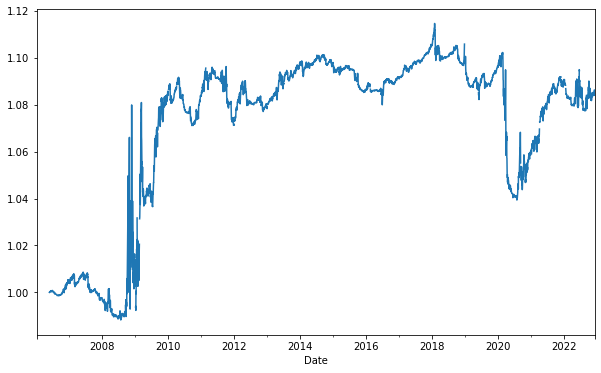

In [120]:
to_index(trade_rets).plot()

Giả sử bạn muốn phân tách hiệu suất chiến lược thành các giai đoạn giao dịch ngày càng
ít biến động hơn. Theo dõi độ lệch chuẩn hàng năm theo dõi một năm là một phép đo
đơn giản về sự biến động và chúng ta có thể tính toán tỷ lệ Sharpe để đánh giá tỷ lệ phần
thưởng trên rủi ro trong các chế độ biến động khác nhau:


In [121]:
vol = pd.Series.rolling(returns, 250, min_periods=200).std() * np.sqrt(250) #tính độ lệch chuẩn
vol

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
                ...   
2022-11-28    0.239531
2022-11-29    0.239293
2022-11-30    0.240899
2022-12-01    0.240751
2022-12-02    0.240696
Name: Adj Close, Length: 4260, dtype: float64

In [122]:
def sharpe(rets, ann=250):
 return rets.mean() / rets.std() * np.sqrt(ann)

Bây giờ, phân chia vào tứ phân vị với qcut và tổng hợp sharpe chúng tôi đạt được:

In [123]:
pd.qcut(vol, 4) #4: tứ phân vị

Date
2006-01-03               NaN
2006-01-04               NaN
2006-01-05               NaN
2006-01-06               NaN
2006-01-09               NaN
                   ...      
2022-11-28    (0.198, 0.457]
2022-11-29    (0.198, 0.457]
2022-11-30    (0.198, 0.457]
2022-12-01    (0.198, 0.457]
2022-12-02    (0.198, 0.457]
Name: Adj Close, Length: 4260, dtype: category
Categories (4, interval[float64, right]): [(0.066, 0.119] < (0.119, 0.153] < (0.153, 0.198] < (0.198, 0.457]]

In [124]:
trade_rets

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
                ...   
2022-11-28   -0.000964
2022-11-29   -0.000109
2022-11-30    0.002132
2022-12-01   -0.000047
2022-12-02   -0.000374
Name: Adj Close, Length: 4414, dtype: float64

In [125]:
trade_rets.groupby(pd.qcut(vol, 4))

In [126]:
trade_rets.groupby(pd.qcut(vol, 4)).agg(sharpe)

Adj Close
(0.066, 0.119]    0.296278
(0.119, 0.153]   -0.327384
(0.153, 0.198]    0.276285
(0.198, 0.457]    0.274366
Name: Adj Close, dtype: float64

In [127]:
#Tỷ lệ Sharpe là lợi nhuận trung bình kiếm được vượt quá tỷ lệ phi rủi ro trên mỗi đơn vị biến động hoặc tổng rủi ro. 
#Công thức 

#Tỷ lệ Sharpe = (Rp – Rf)/ SDp

#Rp là sự trở lại của danh mục đầu tư
#Rf là tỷ lệ không rủi ro
#SDp là độ lệch chuẩn của lợi nhuận của danh mục đầu tư
# https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/

Những kết quả này cho thấy rằng chiến lược hoạt động tốt nhất trong thời kỳ mà sự biến
động là cao nhất.

More Example Applications

3.1 Signal Frontier Analysis

Phân tích biên giới tín hiệu

Trong phần này, tôi sẽ mô tả một danh mục đầu tư động lượng mặt cắt ngang đơn giản
và cho thấy cách bạn có thể khám phá một mạng lưới các tham số hóa mô hình. Đầu tiên,
tôi sẽ tải giá lịch sử cho một danh mục các cổ phiếu tài chính và công nghệ:

In [128]:
import pandas_datareader.data as web

In [129]:
names = ['AAPL', 'GOOG', 'MSFT', 'GS', 'MS', 'BAC', 'C'] 


In [130]:
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = pd.DataFrame({n: get_px(n, '1/1/2009', '6/1/2012') for n in names})


In [131]:
px

,AAPL,GOOG,MSFT,GS,MS,BAC,C
Date,,,,,,,
2008-12-31,2.598351,7.662529,14.534698,76.541870,12.305163,11.825974,55.394268
2009-01-02,2.762747,8.003003,15.200123,78.691467,13.033959,12.035952,58.944138
2009-01-05,2.879346,8.170624,15.342178,80.523575,13.517266,11.741983,58.448792
2009-01-06,2.831854,8.320313,15.521625,80.460121,15.020891,11.993956,61.585865
2009-01-07,2.770662,8.020188,14.587034,76.641617,13.885503,11.515203,59.026684
...,...,...,...,...,...,...,...
2012-05-25,17.118073,14.733027,23.610363,89.705254,10.601680,6.089034,21.936417
2012-05-29,17.421898,14.803015,24.016594,91.215248,10.913732,6.335999,22.392221
2012-05-30,17.631962,14.650835,23.837852,88.185921,10.473660,6.139863,21.546923


Chúng tôi có thể dễ dàng vẽ biểu đồ lợi nhuận tích lũy của mỗi cổ phiếu:


In [132]:
#asfreq: chuyển đổi chuỗi thời gian thành tần số xác định, B: business day frequency (T2-T6)
px = px.asfreq('B').fillna(method='pad')
px

,AAPL,GOOG,MSFT,GS,MS,BAC,C
Date,,,,,,,
2008-12-31,2.598351,7.662529,14.534698,76.541870,12.305163,11.825974,55.394268
2009-01-01,2.598351,7.662529,14.534698,76.541870,12.305163,11.825974,55.394268
2009-01-02,2.762747,8.003003,15.200123,78.691467,13.033959,12.035952,58.944138
2009-01-05,2.879346,8.170624,15.342178,80.523575,13.517266,11.741983,58.448792
2009-01-06,2.831854,8.320313,15.521625,80.460121,15.020891,11.993956,61.585865
...,...,...,...,...,...,...,...
2012-05-28,17.118073,14.733027,23.610363,89.705254,10.601680,6.089034,21.936417
2012-05-29,17.421898,14.803015,24.016594,91.215248,10.913732,6.335999,22.392221
2012-05-30,17.631962,14.650835,23.837852,88.185921,10.473660,6.139863,21.546923


In [133]:
#Tăng trưởng sau so với trước nó
rets = px.pct_change()
rets

,AAPL,GOOG,MSFT,GS,MS,BAC,C
Date,,,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-01-02,0.063269,0.044434,0.045782,0.028084,0.059227,0.017756,0.064084
2009-01-05,0.042204,0.020945,0.009346,0.023282,0.037081,-0.024424,-0.008404
2009-01-06,-0.016494,0.018320,0.011696,-0.000788,0.111237,0.021459,0.053672
...,...,...,...,...,...,...,...
2012-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-05-29,0.017749,0.004750,0.017206,0.016833,0.029434,0.040559,0.020778
2012-05-30,0.012057,-0.010280,-0.007442,-0.033211,-0.040323,-0.030956,-0.037750


In [134]:
(1 + rets).cumprod() - 1

,AAPL,GOOG,MSFT,GS,MS,BAC,C
Date,,,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-01-02,0.063269,0.044434,0.045782,0.028084,0.059227,0.017756,0.064084
2009-01-05,0.108144,0.066309,0.055555,0.052020,0.098504,-0.007102,0.055142
2009-01-06,0.089866,0.085844,0.067901,0.051191,0.220698,0.014205,0.111773
...,...,...,...,...,...,...,...
2012-05-28,5.588051,0.922737,0.624414,0.171976,-0.138436,-0.485114,-0.603995
2012-05-29,5.704981,0.931871,0.652363,0.191704,-0.113077,-0.464230,-0.595766
2012-05-30,5.785826,0.912010,0.640065,0.152127,-0.148840,-0.480815,-0.611026


<AxesSubplot:xlabel='Date'>

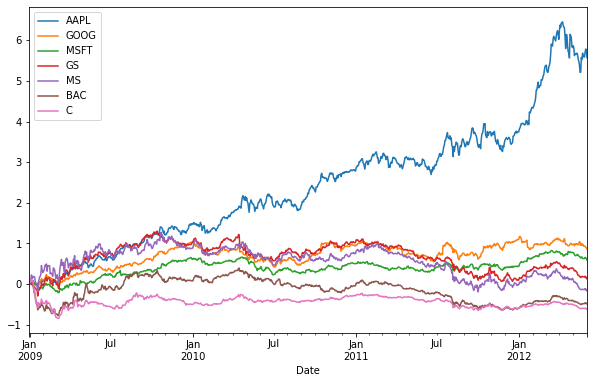

In [135]:
#Tăng trưởng so với ban đầu
((1 + rets).cumprod() - 1).plot()


3.2 Future Contract Rolling

Hợp đồng trong tương lai

Hợp đồng tương lai là một dạng hợp đồng phái sinh phổ biến; đó là một thỏa thuận để
nhận một tài sản nhất định (chẳng hạn như dầu, vàng hoặc cổ phiếu của chỉ số FTSE
100) vào một ngày cụ thể. Trong thực tế, mô hình hóa và giao dịch các hợp đồng tương
lai trên cổ phiếu, tiền tệ ,hàng hóa, trái phiếu và các loại tài sản khác rất phức tạp do tính
chất có thời hạn của mỗi hợp đồng. Ví dụ: tại bất kỳ thời điểm nào cho một loại tương
lai (chẳng hạn như hợp đồng tương lai bạc hoặc đồng), nhiều hợp đồng với các ngày hết
hạn có thể được giao dịch. Trong nhiều trường hợp, hợp đồng tương lai sẽ hết hạn tiếp
theo (ở gần hợp đồng) sẽ có tính thanh khoản cao nhất (khối lượng cao nhất và chênh
lệch giá mua-bán thấp nhất).

Đối với mục đích mô hình hóa và dự báo, có thể dễ dàng hơn nhiều để làm việc với chỉ
số hoàn vốn liên tục cho thấy lợi nhuận và thua lỗ liên quan đến việc luôn giữ hợp đồng
gần. Chuyển đổi từ hợp đồng hết hạn sang hợp đồng tiếp theo (hoặc xa hơn) được gọi là
rolling. Tính toán một chuỗi liên tục trong tương lai từ dữ liệu cá nhân không nhất thiết
phải là một bài tập đơn giản và thường đòi hỏi sự hiểu biết sâu sắc hơn về thị trường và
cách các công cụ được giao dịch. Ví dụ: trong thực tế, khi nào và bao lâu bạn sẽ giao
dịch ra khỏi một hợp đồng sắp hết hạn và vào hợp đồng tiếp theo? Ở đây tôi mô tả một
quá trình như vậy.

Đầu tiên, tôi sẽ sử dụng giá quy mô cho quỹ giao dịch trao đổi SPY làm đại diện cho
chỉ số S&P 500:


In [136]:
import pandas_datareader.data as web
# Approximate price of S&P 500 index
px = web.get_data_yahoo('SPY')['Adj Close'] * 10
px

Date
2017-12-04    2423.903503
2017-12-05    2415.185547
2017-12-06    2415.644379
2017-12-07    2423.260956
2017-12-08    2436.475525
                 ...     
2022-11-28    3959.100037
2022-11-29    3952.300110
2022-11-30    4076.799927
2022-12-01    4073.800049
2022-12-02    4029.577942
Name: Adj Close, Length: 1259, dtype: float64

Bây giờ, một chút thiết lập. Tôi đã đặt một số hợp đồng tương lai và ngày hết hạn của
S&P 500 vào một Series:

In [137]:
from datetime import datetime
expiry = {'ESU2': datetime(2012, 9, 21),
        'ESZ2': datetime(2012, 12, 21)}
expiry = pd.Series(expiry).sort_values()

expiry sẽ trông như thế này

In [138]:
expiry

ESU2   2012-09-21
ESZ2   2012-12-21
dtype: datetime64[ns]

Sau đó, tôi sử dụng Yahoo! Giá tài chính cùng với một bước đi ngẫu nhiên và một số
nhiễu để mô phỏng hai hợp đồng trong tương lai:

In [139]:
np.random.seed(12347)
N = 200

In [140]:
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
walk

array([ 21.  ,  24.75,  10.5 , -17.5 ,   2.  , -16.5 ,  -2.  ,  -4.5 ,
        20.  ,   5.75,   0.5 ,  11.5 ,  15.5 ,  -3.  ,  23.25,  16.25,
        -3.25,  -8.75,  10.25,  21.25,   6.75,  14.75,   7.5 ,   1.25,
       -20.25,  16.5 ,   5.  ,   2.75, -14.5 ,   7.75,   4.5 ,  24.25,
       -19.25, -14.75,  12.5 ,   3.  , -10.25,   2.75,  18.  ,  -7.  ,
        -2.25,   4.75, -16.  ,   3.25,  12.5 ,   1.  ,  -7.25,   5.5 ,
        13.5 ,  19.75,  24.75,  23.5 ,  22.5 ,   2.75, -19.  ,  24.75,
       -13.75,   4.5 ,   7.75,   8.  ,  12.  ,  10.25, -13.25,  -5.  ,
         7.5 ,  -3.5 ,  19.  ,   7.75, -15.5 ,   1.5 , -16.75, -18.75,
       -15.25,  -3.  ,  23.25,  19.25, -16.75, -21.  , -11.75,   2.75,
       -17.5 ,  14.75,  -7.25, -10.75,   7.5 ,   9.75, -16.75, -22.25,
       -18.25,  15.  ,  -7.75,  21.25,  13.5 ,  -3.25, -16.25,   6.75,
       -19.  , -12.5 ,  23.5 ,  15.5 ,  -8.  ,  15.  ,   5.75,   0.  ,
       -17.  , -13.5 , -13.5 ,  -8.75, -24.25,  24.  ,  24.25,   6.  ,
      

In [141]:
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
perturb

array([ 0.5 , -1.5 ,  0.5 , -0.25,  1.  , -1.25,  1.5 , -0.25,  0.  ,
       -2.5 , -1.25, -1.5 ,  0.25,  1.25,  0.75,  1.25,  1.5 ,  0.25,
       -1.  ,  2.  , -1.25,  1.25,  0.25,  1.5 ,  0.75, -2.25, -2.5 ,
       -1.75,  1.  , -1.75, -2.25, -2.5 , -0.75,  1.75,  0.25, -2.  ,
       -0.5 ,  0.5 ,  0.25,  1.5 , -1.5 , -0.5 , -0.25, -1.75,  1.  ,
       -2.5 , -1.  ,  1.5 , -0.5 ,  1.5 ,  0.25, -2.25, -0.5 ,  1.25,
       -2.5 ,  2.  ,  2.25, -1.  , -0.75,  0.25,  2.25,  0.25,  0.25,
        0.5 , -1.75, -2.  ,  0.25, -2.  ,  0.75,  0.25,  0.5 ,  1.75,
       -0.75,  0.25, -1.75, -0.5 ,  0.75, -1.25,  0.75, -1.75,  2.  ,
       -2.25,  1.25, -0.5 , -0.25, -0.5 , -2.  , -1.5 , -2.25,  1.25,
        2.25, -2.25,  0.25, -1.  , -1.  , -2.  , -1.5 ,  2.25, -0.75,
        0.  , -1.75, -1.  ,  0.75,  1.75,  2.  , -1.75,  2.  ,  0.5 ,
        0.  ,  0.25,  2.  , -0.75, -2.  ,  0.25, -0.75, -0.25, -0.5 ,
       -0.25,  1.  , -0.5 ,  2.  ,  1.  , -0.75,  1.25,  0.75,  2.25,
       -0.25, -2.5 ,

In [142]:
walk = walk.cumsum() #Tính tổng tích lũy
walk

array([ 21.  ,  45.75,  56.25,  38.75,  40.75,  24.25,  22.25,  17.75,
        37.75,  43.5 ,  44.  ,  55.5 ,  71.  ,  68.  ,  91.25, 107.5 ,
       104.25,  95.5 , 105.75, 127.  , 133.75, 148.5 , 156.  , 157.25,
       137.  , 153.5 , 158.5 , 161.25, 146.75, 154.5 , 159.  , 183.25,
       164.  , 149.25, 161.75, 164.75, 154.5 , 157.25, 175.25, 168.25,
       166.  , 170.75, 154.75, 158.  , 170.5 , 171.5 , 164.25, 169.75,
       183.25, 203.  , 227.75, 251.25, 273.75, 276.5 , 257.5 , 282.25,
       268.5 , 273.  , 280.75, 288.75, 300.75, 311.  , 297.75, 292.75,
       300.25, 296.75, 315.75, 323.5 , 308.  , 309.5 , 292.75, 274.  ,
       258.75, 255.75, 279.  , 298.25, 281.5 , 260.5 , 248.75, 251.5 ,
       234.  , 248.75, 241.5 , 230.75, 238.25, 248.  , 231.25, 209.  ,
       190.75, 205.75, 198.  , 219.25, 232.75, 229.5 , 213.25, 220.  ,
       201.  , 188.5 , 212.  , 227.5 , 219.5 , 234.5 , 240.25, 240.25,
       223.25, 209.75, 196.25, 187.5 , 163.25, 187.25, 211.5 , 217.5 ,
      

In [143]:
len(px) + N

1459

In [144]:
px.index[0]

Timestamp('2017-12-04 00:00:00')

In [145]:
rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
rng

DatetimeIndex(['2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
               '2017-12-08', '2017-12-11', '2017-12-12', '2017-12-13',
               '2017-12-14', '2017-12-15',
               ...
               '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30', '2023-07-03', '2023-07-04',
               '2023-07-05', '2023-07-06'],
              dtype='datetime64[ns]', length=1459, freq='B')

In [146]:
(px.values[-1] + walk).shape
px.values[-1] + walk

(200,)

array([4050.5779, 4075.3279, 4085.8279, 4068.3279, 4070.3279, 4053.8279,
       4051.8279, 4047.3279, 4067.3279, 4073.0779, 4073.5779, 4085.0779,
       4100.5779, 4097.5779, 4120.8279, 4137.0779, 4133.8279, 4125.0779,
       4135.3279, 4156.5779, 4163.3279, 4178.0779, 4185.5779, 4186.8279,
       4166.5779, 4183.0779, 4188.0779, 4190.8279, 4176.3279, 4184.0779,
       4188.5779, 4212.8279, 4193.5779, 4178.8279, 4191.3279, 4194.3279,
       4184.0779, 4186.8279, 4204.8279, 4197.8279, 4195.5779, 4200.3279,
       4184.3279, 4187.5779, 4200.0779, 4201.0779, 4193.8279, 4199.3279,
       4212.8279, 4232.5779, 4257.3279, 4280.8279, 4303.3279, 4306.0779,
       4287.0779, 4311.8279, 4298.0779, 4302.5779, 4310.3279, 4318.3279,
       4330.3279, 4340.5779, 4327.3279, 4322.3279, 4329.8279, 4326.3279,
       4345.3279, 4353.0779, 4337.5779, 4339.0779, 4322.3279, 4303.5779,
       4288.3279, 4285.3279, 4308.5779, 4327.8279, 4311.0779, 4290.0779,
       4278.3279, 4281.0779, 4263.5779, 4278.3279, 

In [147]:
(px.values).shape
px.values

(1259,)

array([2423.9035, 2415.1855, 2415.6444, ..., 4076.7999, 4073.8   ,
       4029.5779])

In [148]:
near = np.concatenate([px.values, px.values[-1] + walk])
near.shape
near

(1459,)

array([2423.9035, 2415.1855, 2415.6444, ..., 4053.0779, 4069.5779,
       4049.5779])

In [149]:
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
far.shape
far

(1459,)

array([2423.9035, 2415.1855, 2415.6444, ..., 4054.8279, 4068.8279,
       4047.3279])

In [150]:
prices = pd.DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)
prices

,ESU2,ESZ2
2017-12-04,2423.903503,2423.903503
2017-12-05,2415.185547,2415.185547
2017-12-06,2415.644379,2415.644379
2017-12-07,2423.260956,2423.260956
2017-12-08,2436.475525,2436.475525
...,...,...
2023-06-30,4058.827942,4060.577942
2023-07-03,4045.077942,4047.327942
2023-07-04,4053.077942,4054.827942
2023-07-05,4069.577942,4068.827942


prices sau đó có hai chuỗi thời gian cho các hợp đồng khác nhau một lượng ngẫu nhiên:

In [151]:
prices.tail()

,ESU2,ESZ2
2023-06-30,4058.827942,4060.577942
2023-07-03,4045.077942,4047.327942
2023-07-04,4053.077942,4054.827942
2023-07-05,4069.577942,4068.827942
2023-07-06,4049.577942,4047.327942


Một cách để nối các chuỗi thời gian với nhau thành một chuỗi liên tục là xây dựng ma
trận trọng số. Các hợp đồng đang hoạt động sẽ có trọng số là 1 cho đến khi ngày hết hạn
gần kề. Tại thời điểm đó, bạn phải quyết định một quy ước cuộn. Đây là một hàm tính
toán một ma trận trọng số với phân rã tuyến tính trong một số khoảng thời gian dẫn đến
hết hạn:


In [152]:
def get_roll_weights(start, expiry, items, roll_periods=5):
 # start : first date to compute weighting DataFrame
 # expiry : Series of ticker -> expiration dates
 # items : sequence of contract names
    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = pd.DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)
    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            #ix[] đã được thay bằng loc[]
            weights.loc[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                    periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.loc[roll_rng, item] = 1 - decay_weights
            weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.loc[prev_date:, item] = 1
    prev_date = ex_date
    return weights


Các trọng số trông như thế này xung quanh ESU2 expiry:


In [153]:
expiry[-1]

Timestamp('2012-12-21 00:00:00')

In [154]:
test_dates = pd.date_range('6/1/2012', expiry[-1], freq='B')
test_dates

DatetimeIndex(['2012-06-01', '2012-06-04', '2012-06-05', '2012-06-06',
               '2012-06-07', '2012-06-08', '2012-06-11', '2012-06-12',
               '2012-06-13', '2012-06-14',
               ...
               '2012-12-10', '2012-12-11', '2012-12-12', '2012-12-13',
               '2012-12-14', '2012-12-17', '2012-12-18', '2012-12-19',
               '2012-12-20', '2012-12-21'],
              dtype='datetime64[ns]', length=146, freq='B')

In [155]:
len(test_dates)

146

In [156]:
prices.columns
len(prices.columns)

Index(['ESU2', 'ESZ2'], dtype='object')

2

In [157]:
test_weights = pd.DataFrame(np.zeros((len(test_dates), len(prices.columns))),
                        index=test_dates, columns=prices.columns)
test_weights

,ESU2,ESZ2
2012-06-01,0.0,0.0
2012-06-04,0.0,0.0
2012-06-05,0.0,0.0
2012-06-06,0.0,0.0
2012-06-07,0.0,0.0
...,...,...
2012-12-17,0.0,0.0
2012-12-18,0.0,0.0
2012-12-19,0.0,0.0
2012-12-20,0.0,0.0


In [158]:
test_prev_date = test_weights.index[0]
test_prev_date

Timestamp('2012-06-01 00:00:00', freq='B')

In [159]:
roll_periods=5
for i, (item, ex_date) in enumerate(expiry.iteritems()):
    if i < len(expiry) - 1:
        #ix[] đã được thay bằng loc[]
        test_weights.loc[test_prev_date:ex_date - pd.offsets.BDay(), item] = 1
        roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                periods=roll_periods + 1, freq='B')
        decay_weights = np.linspace(0, 1, roll_periods + 1)
        test_weights.loc[roll_rng, item] = 1 - decay_weights
        test_weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
    else:
        test_weights.loc[test_prev_date:, item] = 1

In [160]:
test_weights

,ESU2,ESZ2
2012-06-01,1.0,1.0
2012-06-04,1.0,1.0
2012-06-05,1.0,1.0
2012-06-06,1.0,1.0
2012-06-07,1.0,1.0
...,...,...
2012-12-17,0.0,1.0
2012-12-18,0.0,1.0
2012-12-19,0.0,1.0
2012-12-20,0.0,1.0


.............................

In [161]:

weights = get_roll_weights('6/1/2012', expiry, prices.columns)

In [162]:
weights.loc['2012-09-12':'2012-09-21']


,ESU2,ESZ2
2012-09-12,1.0,1.0
2012-09-13,1.0,1.0
2012-09-14,0.8,1.0
2012-09-17,0.6,1.0
2012-09-18,0.4,1.0
2012-09-19,0.2,1.0
2012-09-20,0.0,1.0
2012-09-21,0.0,1.0


Cuối cùng, lợi nhuận tương lai được chuyển nhượng chỉ là một tổng trọng số của lợi
nhuận hợp đồng:


In [163]:
rolled_returns = (prices.pct_change() * weights).sum(1)


3.3 Rolling Correlation and Linear Regression

Tương quan cuộn và hồi quy tuyến tính

Các mô hình động đóng một vai trò quan trọng trong mô hình tài chính vì chúng có
thể được sử dụng để mô phỏng các quyết định giao dịch trong một giai đoạn lịch sử. Di
chuyển cửa sổ và chức năng chuỗi thời gian có trọng số theo cấp số nhân là một ví dụ về
các công cụ được sử dụng cho các mô hình động.

Tương quan là một cách để xem xét sự đồng chuyển động giữa những thay đổi trong hai
chuỗi thời gian của nội dung. Hàm rolling-cor có thể được gọi với hai chuỗi trả về để tính
toán tương quan cửa sổ chuyển động. Đầu tiên, tôi tải một số chuỗi giá từ Yahoo!Finance
và tính toán lợi nhuận hàng ngày:

In [164]:
aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']
aapl

Date
1999-12-31      0.782493
2000-01-03      0.851942
2000-01-04      0.780115
2000-01-05      0.791530
2000-01-06      0.723033
                 ...    
2022-11-28    144.220001
2022-11-29    141.169998
2022-11-30    148.029999
2022-12-01    148.309998
2022-12-02    146.009995
Name: Adj Close, Length: 5769, dtype: float64

In [165]:
msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']
msft

Date
1999-12-31     36.511276
2000-01-03     36.452641
2000-01-04     35.221272
2000-01-05     35.592636
2000-01-06     34.400341
                 ...    
2022-11-28    241.759995
2022-11-29    240.330002
2022-11-30    255.139999
2022-12-01    254.690002
2022-12-02    250.739899
Name: Adj Close, Length: 5769, dtype: float64

In [166]:
aapl_rets = aapl.pct_change()
aapl_rets


Date
1999-12-31         NaN
2000-01-03    0.088754
2000-01-04   -0.084310
2000-01-05    0.014633
2000-01-06   -0.086538
                ...   
2022-11-28   -0.026264
2022-11-29   -0.021148
2022-11-30    0.048594
2022-12-01    0.001892
2022-12-02   -0.015508
Name: Adj Close, Length: 5769, dtype: float64

In [167]:
msft_rets = msft.pct_change()
msft_rets

Date
1999-12-31         NaN
2000-01-03   -0.001606
2000-01-04   -0.033780
2000-01-05    0.010544
2000-01-06   -0.033498
                ...   
2022-11-28   -0.023152
2022-11-29   -0.005915
2022-11-30    0.061624
2022-12-01   -0.001764
2022-12-02   -0.015509
Name: Adj Close, Length: 5769, dtype: float64

Sau đó, tôi tính toán và vẽ biểu đồ tương quan biến động trong một năm:

In [168]:
type(msft_rets)

pandas.core.series.Series

In [169]:
#Tính tương quan của apple với microsoft
aapl_rets.rolling(250).corr(msft_rets)

#corr viết tắt: Correlation Coefficient: hệ số tương quan
#rolling: cửa sổ cuộn, 250: lấy 250 hệ số tương quan

Date
1999-12-31         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
                ...   
2022-11-28    0.819956
2022-11-29    0.819295
2022-11-30    0.823090
2022-12-01    0.822929
2022-12-02    0.823320
Name: Adj Close, Length: 5769, dtype: float64

<AxesSubplot:xlabel='Date'>

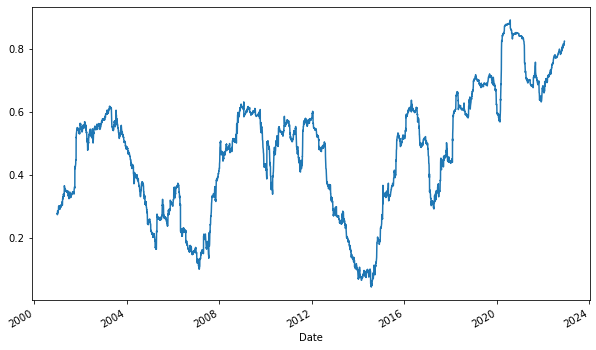

In [170]:
aapl_rets.rolling(250).corr(msft_rets).plot()
